In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

phy_train=pd.read_csv('PHY_TRAIN.csv')
phy_train

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
2,3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
3,4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49996,49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662
49998,49999,1,0.000000,0.000000,0.000000,0,0.855551,0.0,-0.849437,1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [2]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(phy_train))
idf.columns=phy_train.columns
idf.index=phy_train.index
null_columns=idf.columns[idf.isnull().any()]
null_columns

Index([], dtype='object')

In [3]:
X=idf.iloc[:,2:]
y=idf.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# Fit regression model
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier


clf = ensemble.GradientBoostingClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

True Positive Rate:  0.7172693869657707
False Positive Rate:  0.27189894388072067
Accuracy: 0.7225
Precision: 0.7281010561192793
Recall: 0.7063077541181197


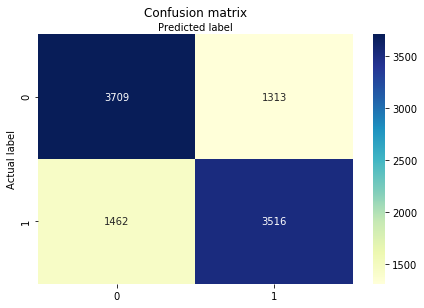

In [17]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print("True Positive Rate: ",TPR)
print("False Positive Rate: ", FPR)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

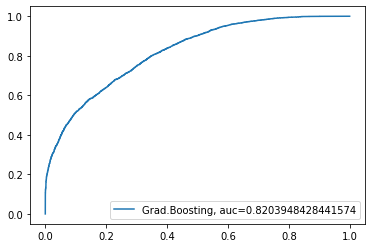

In [18]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Grad.Boosting, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
stdev = np.sqrt(sum((clf.predict(X_train) - y_train)**2) / (len(y_train) - 2))

stdev

0.44964998527239247

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2687
Mean Squared Error: 0.2687
Root Mean Squared Error: 0.5183628073077774
